In [34]:
import numpy as np
import pandas as pd



In [23]:
# Load the Excel file
file_path = '/Users/ab799/Documents/Calibration_Data_Summary_Updated.xlsx'

# Read the first sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name=0)  # Use sheet_name to specify the sheet, e.g., 0 for the first sheet

# Display the first few rows to verify the data
print(df.head())


                    Phantom Solution  Alpha (α)  Alpha (SE)  Beta (β)  \
0                      Ionic control    -106.20        2.33    318.65   
1  Neuronal cell ionic concentration    -105.41        2.15    316.26   
2     Glial cell ionic concentration    -101.72        1.59    305.16   
3                         Protein 5%     -94.65        1.40    289.13   
4                        Protein 10%    -104.13        1.54    314.57   

   Beta (SE)    R^2  Δ(H2O-NAA) ppm at 37°C  Δ(H2O-NAA) ppm at 37°C (SE)  \
0       3.81  0.992                   2.652                        0.006   
1       3.53  0.993                   2.649                        0.006   
2       2.61  0.997                   2.636                        0.004   
3       2.31  0.999                   2.664                        0.003   
4       2.55  0.998                   2.666                        0.004   

   ΔT_neuronal  ΔT_neuronal (SE)  ...  phosphate buffer (mM)  \
0        -0.30              0.64  ...   

In [24]:
import statsmodels.api as sm

# Select relevant columns and rename them for convenience
data = df[['Alpha (α)', 'Beta (β)', 'NAA (mM)', 'NaCl (mM)', 'KCl (mM)', 'Protein BSA (%) W/V']].dropna()

# Define the predictors and target variables
X = data[['NAA (mM)', 'NaCl (mM)', 'KCl (mM)', 'Protein BSA (%) W/V']]
X = sm.add_constant(X)  # Adds a constant term for the intercept

# Separate models for Alpha and Beta
y_alpha = data['Alpha (α)']
y_beta = data['Beta (β)']

# Fit the regression model for Alpha
model_alpha = sm.OLS(y_alpha, X).fit()

# Fit the regression model for Beta
model_beta = sm.OLS(y_beta, X).fit()

# Print the summary of each model to see coefficients and p-values
print("Model for Alpha:")
print(model_alpha.summary())

print("\nModel for Beta:")
print(model_beta.summary())


Model for Alpha:
                            OLS Regression Results                            
Dep. Variable:              Alpha (α)   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     2.102
Date:                Tue, 05 Nov 2024   Prob (F-statistic):              0.139
Time:                        10:46:38   Log-Likelihood:                -45.085
No. Observations:                  18   AIC:                             100.2
Df Residuals:                      13   BIC:                             104.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

/Users/ab799/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/ab799/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


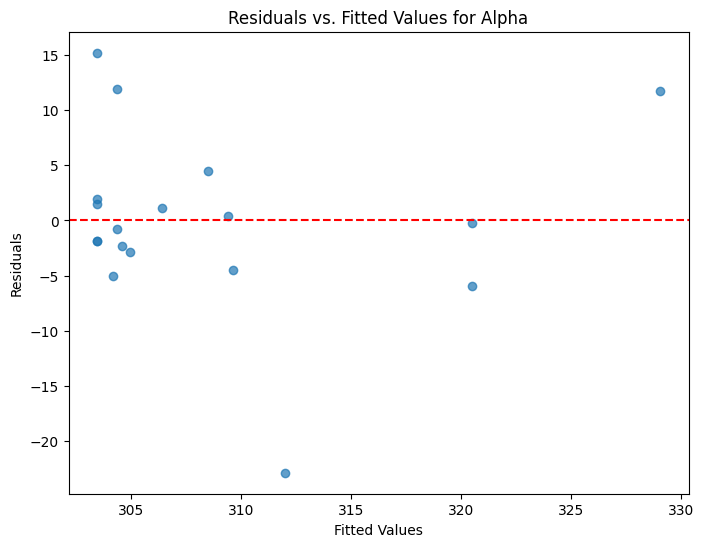

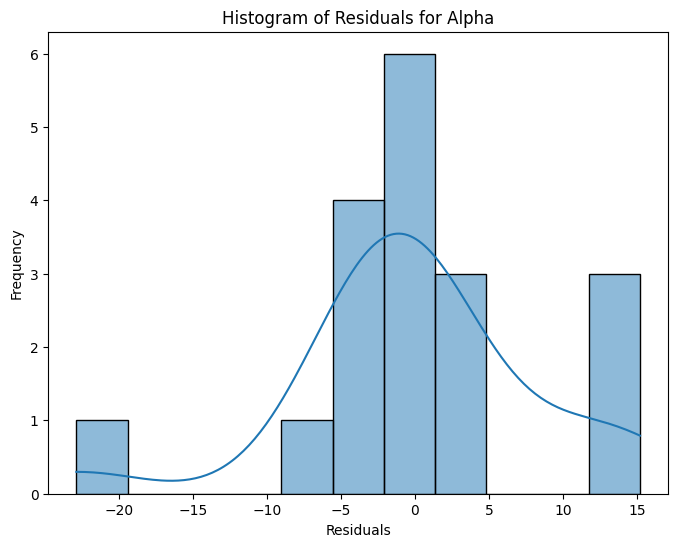

<Figure size 800x600 with 0 Axes>

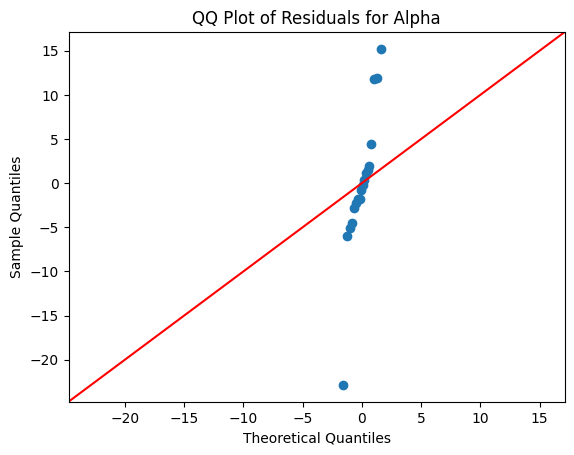

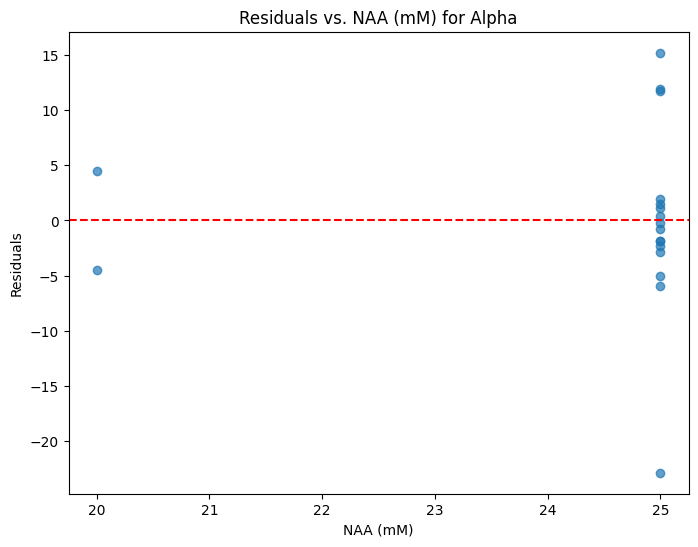

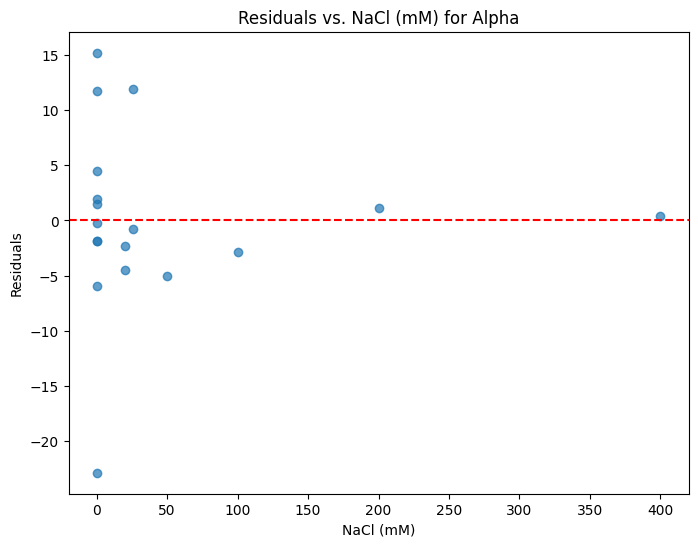

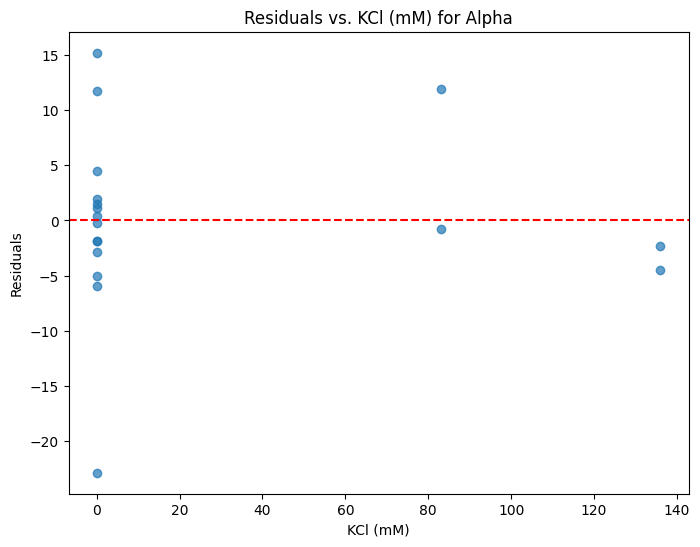

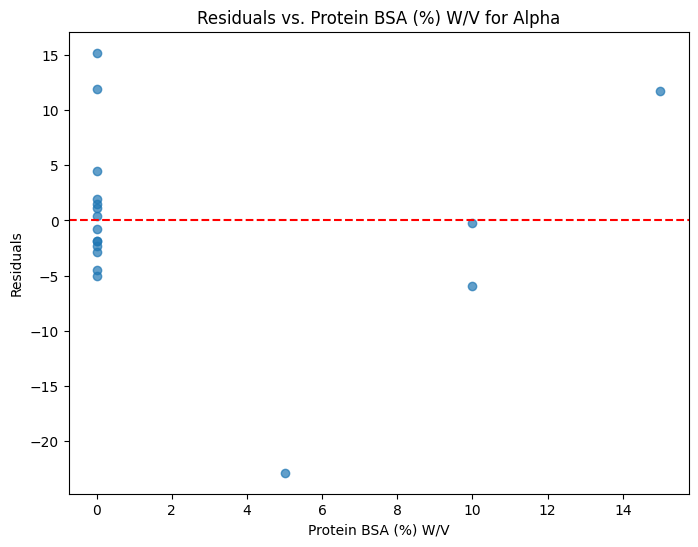

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the model for Alpha (as an example; repeat for Beta if needed)
model_beta = sm.OLS(y_beta, X).fit()
residuals_beta = model_beta.resid
fitted_beta = model_beta.fittedvalues

# 1. Residuals vs. Fitted Values
plt.figure(figsize=(8, 6))
plt.scatter(fitted_beta, residuals_beta, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values for Alpha')
plt.show()

# 2. Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_beta, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Alpha')
plt.show()

# 3. QQ Plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_beta, line='45')
plt.title('QQ Plot of Residuals for Alpha')
plt.show()

# 4. Residuals vs. Each Predictor
predictor_names = ['NAA (mM)', 'NaCl (mM)', 'KCl (mM)', 'Protein BSA (%) W/V']
for predictor in predictor_names:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[predictor], residuals_beta, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(predictor)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. {predictor} for Alpha')
    plt.show()


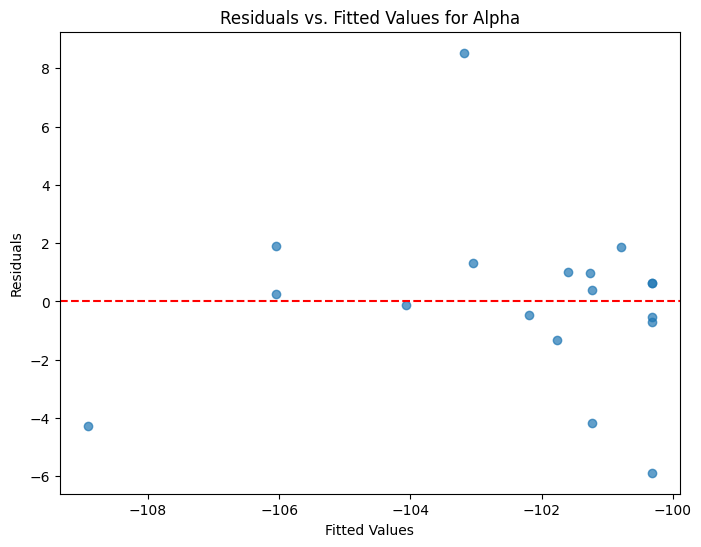

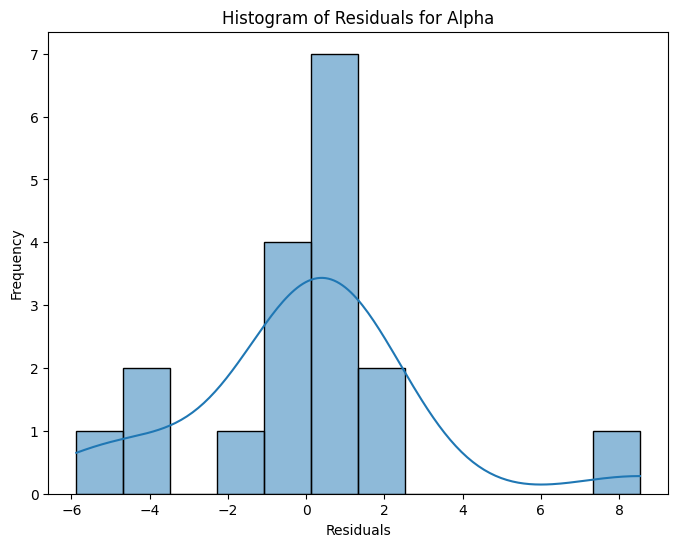

<Figure size 800x600 with 0 Axes>

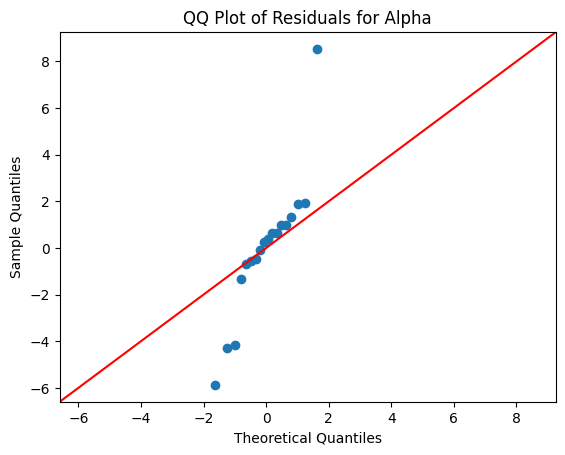

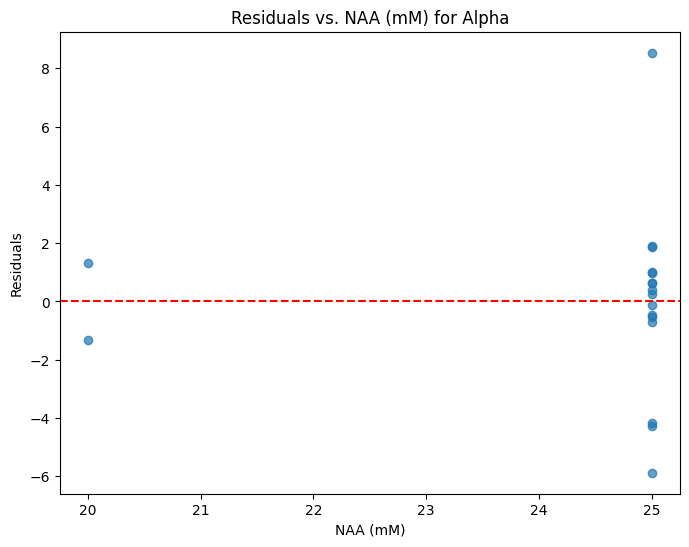

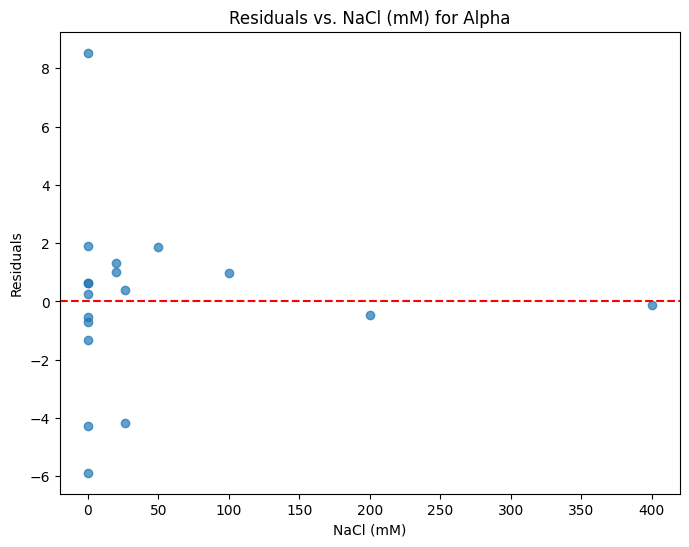

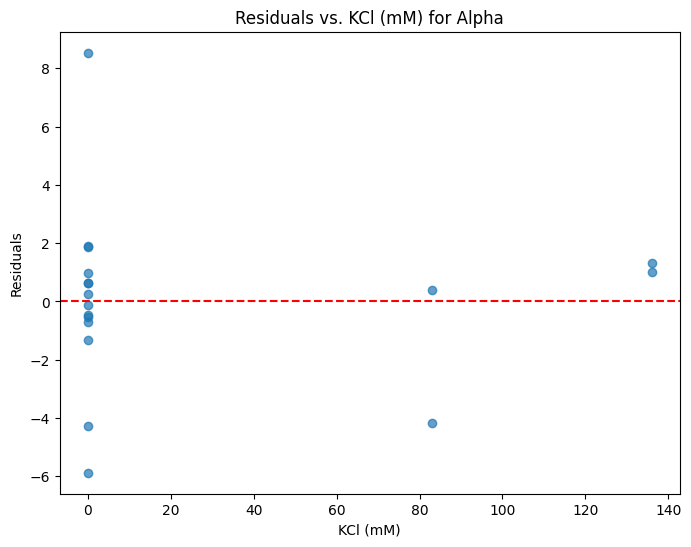

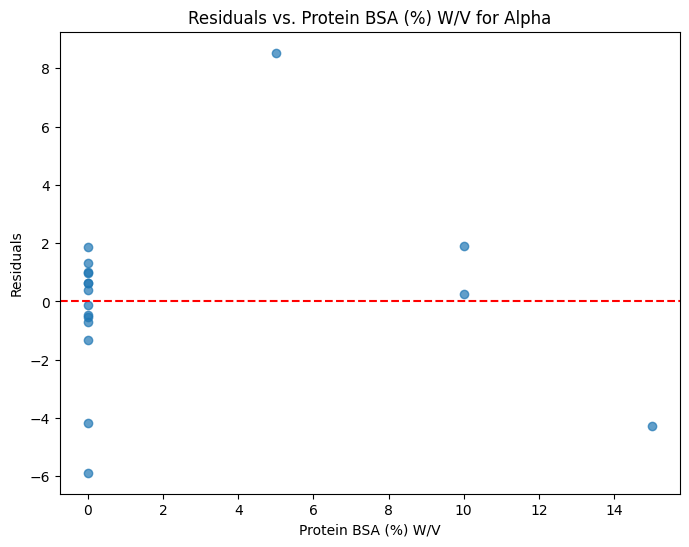

In [26]:

# Fit the model for Alpha (as an example; repeat for Beta if needed)
model_alpha = sm.OLS(y_alpha, X).fit()
residuals_alpha = model_alpha.resid
fitted_alpha = model_alpha.fittedvalues

# 1. Residuals vs. Fitted Values
plt.figure(figsize=(8, 6))
plt.scatter(fitted_alpha, residuals_alpha, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values for Alpha')
plt.show()

# 2. Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_alpha, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Alpha')
plt.show()

# 3. QQ Plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_alpha, line='45')
plt.title('QQ Plot of Residuals for Alpha')
plt.show()

# 4. Residuals vs. Each Predictor
predictor_names = ['NAA (mM)', 'NaCl (mM)', 'KCl (mM)', 'Protein BSA (%) W/V']
for predictor in predictor_names:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[predictor], residuals_alpha, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(predictor)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. {predictor} for Alpha')
    plt.show()


In [42]:
# Define predictors and target variable for Alpha
data = df[['Alpha (α)', 'Beta (β)', 'NAA (mM)', 'NaCl (mM)', 'KCl (mM)', 'Protein BSA (%) W/V']].dropna()

#data = data.replace(0, 1e-10)




X_alpha = data[['NAA (mM)', 'NaCl (mM)', 'KCl (mM)','Protein BSA (%) W/V']]
X_alpha = sm.add_constant(X_alpha)  # Add a constant term for the intercept
y_alpha = data['Alpha (α)']
if X_alpha.shape[0] == 0 or y_alpha.shape[0] == 0:
    raise ValueError("The data contains no rows after filtering. Check your filtering steps.")

# Fit the GLM model for Alpha using a Gamma family with a log link
glm_alpha = sm.GLM(y_alpha, X_alpha).fit()

# Print the model summary
print("GLM Model Summary for Alpha:")
print(glm_alpha.summary())



X_beta = data[['NAA (mM)', 'NaCl (mM)', 'KCl (mM)','Protein BSA (%) W/V']]
X_beta = sm.add_constant(X_beta)  # Add a constant term for the intercept
y_beta = data['Beta (β)']
if X_beta.shape[0] == 0 or y_beta.shape[0] == 0:
    raise ValueError("The data contains no rows after filtering. Check your filtering steps.")

# Fit the GLM model for Alpha using a Gamma family with a log link
glm_beta = sm.GLM(y_beta, X_beta).fit()

# Print the model summary
print("GLM Model Summary for Beta:")
print(glm_beta.summary())

GLM Model Summary for Alpha:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Alpha (α)   No. Observations:                   18
Model:                            GLM   Df Residuals:                       13
Model Family:                Gaussian   Df Model:                            4
Link Function:               Identity   Scale:                          12.146
Method:                          IRLS   Log-Likelihood:                -45.085
Date:                Tue, 05 Nov 2024   Deviance:                       157.89
Time:                        13:02:59   Pearson chi2:                     158.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4024
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const

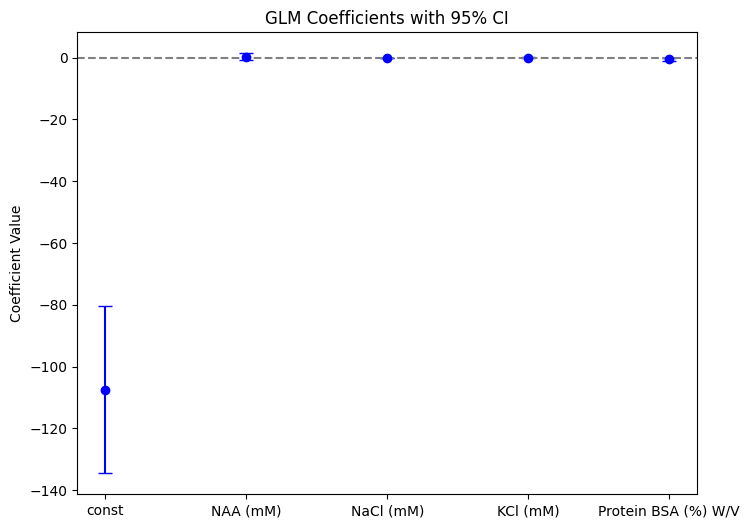

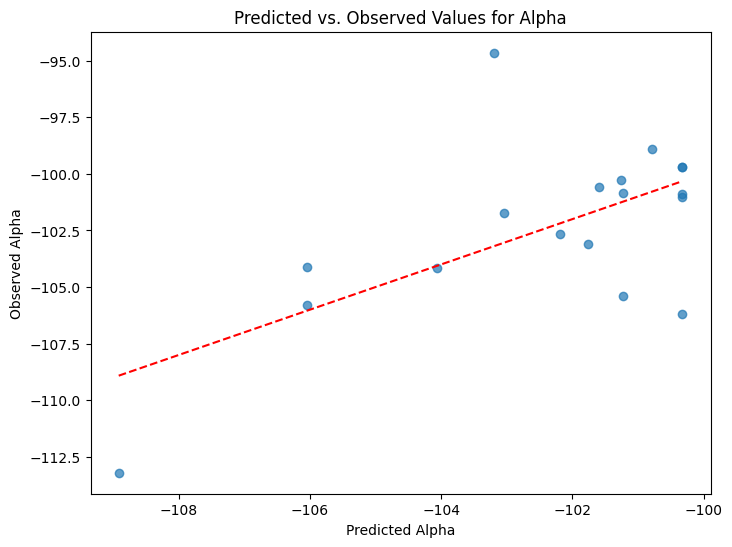

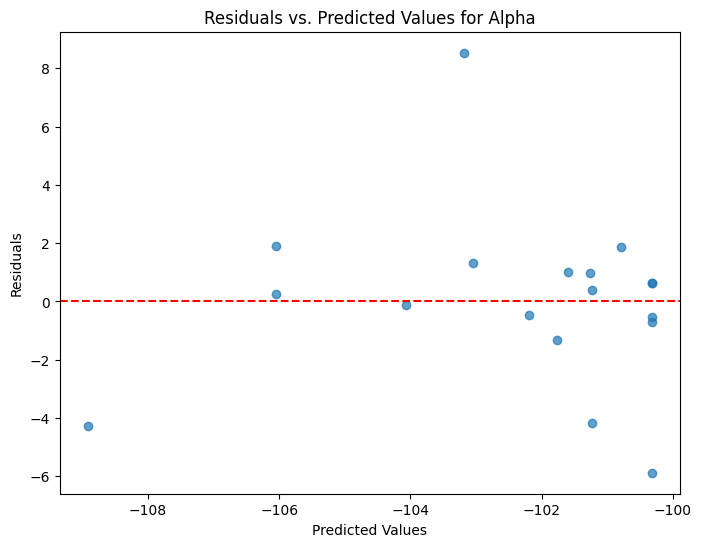

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Assuming glm_alpha is your fitted GLM model for Alpha

# 1. Coefficient Plot
coefs = glm_alpha.params
conf = glm_alpha.conf_int()
conf['coef'] = coefs
conf.columns = ['2.5%', '97.5%', 'coef']
plt.figure(figsize=(8, 6))
plt.errorbar(conf.index, conf['coef'], 
             yerr=[conf['coef'] - conf['2.5%'], conf['97.5%'] - conf['coef']], 
             fmt='o', capsize=5, color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Coefficient Value')
plt.title('GLM Coefficients with 95% CI')
plt.show()

# 2. Predicted vs. Observed Plot
predicted_values = glm_alpha.fittedvalues
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, data['Alpha (α)'], alpha=0.7)
plt.plot([min(predicted_values), max(predicted_values)], 
         [min(predicted_values), max(predicted_values)], 'r--')
plt.xlabel('Predicted Alpha')
plt.ylabel('Observed Alpha')
plt.title('Predicted vs. Observed Values for Alpha')
plt.show()

# 3. Residual Plot
residuals = glm_alpha.resid_response
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values for Alpha')
plt.show()



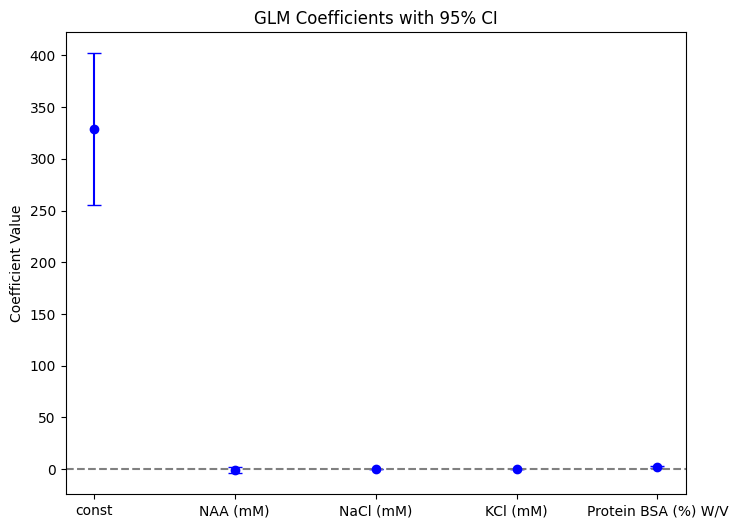

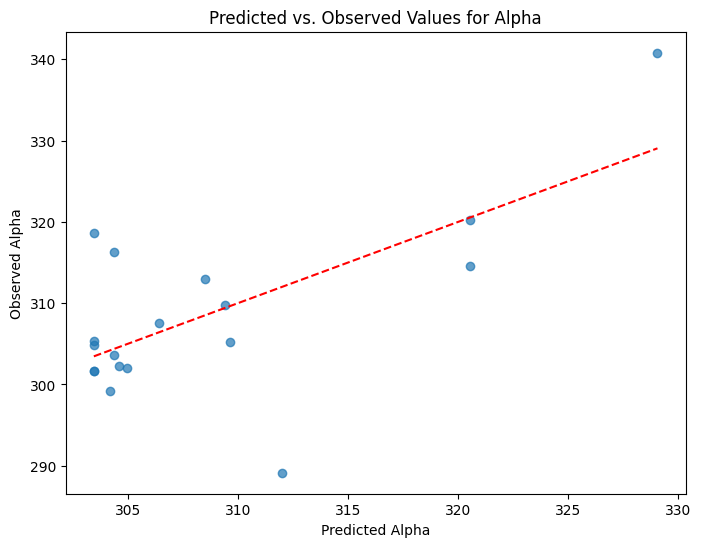

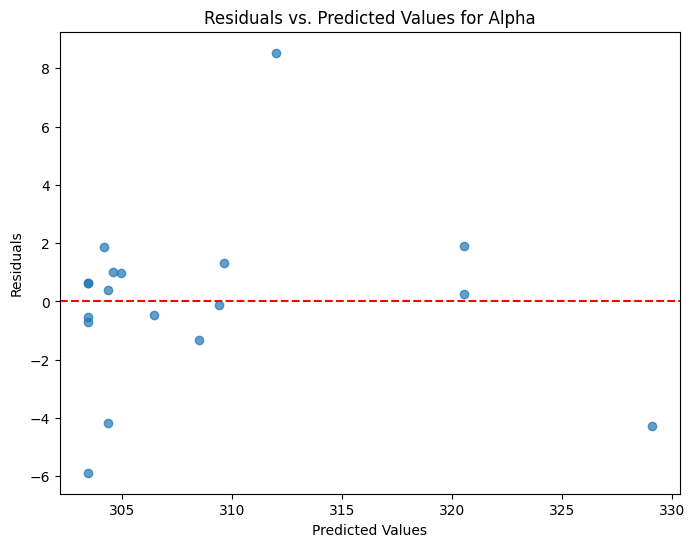

In [45]:

# Assuming glm_alpha is your fitted GLM model for Alpha

# 1. Coefficient Plot
coefs = glm_beta.params
conf = glm_beta.conf_int()
conf['coef'] = coefs
conf.columns = ['2.5%', '97.5%', 'coef']
plt.figure(figsize=(8, 6))
plt.errorbar(conf.index, conf['coef'], 
             yerr=[conf['coef'] - conf['2.5%'], conf['97.5%'] - conf['coef']], 
             fmt='o', capsize=5, color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Coefficient Value')
plt.title('GLM Coefficients with 95% CI')
plt.show()

# 2. Predicted vs. Observed Plot
predicted_values = glm_beta.fittedvalues
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, data['Beta (β)'], alpha=0.7)
plt.plot([min(predicted_values), max(predicted_values)], 
         [min(predicted_values), max(predicted_values)], 'r--')
plt.xlabel('Predicted Alpha')
plt.ylabel('Observed Alpha')
plt.title('Predicted vs. Observed Values for Alpha')
plt.show()

# 3. Residual Plot
residuals = glm_alpha.resid_response
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values for Alpha')
plt.show()
